# Introvert-Extrovert Behavior Analysis - With Databricks Notebooks

In this notebook we explore the ***peculiar*** yet ***fascinating*** intricacies of ***Introverts*** and ***Extrvoerts***, leveraging modern technologies used for ***Datascience***


## Advantages of Databricks Notebook for Big Data Analytics
- **Unified Environment**: Combines data engineering, machine learning, and analytics in a single workspace.
- **Collaborative Features**: Supports real-time coauthoring, version control, and built-in visualizations.
- **Multi-language Support**: Allows execution of Python, SQL, Scala, and R within the same notebook.
- **Optimized for Apache Spark**: Provides seamless integration with Spark for distributed computing.
- **Automated Workflows**: Enables scheduling and execution of multi-notebook workflows.
- **Data Exploration & Visualization**: Facilitates exploratory data analysis (EDA) with interactive visualizations.

## Databricks Notebook vs BigQuery Usage
- **Databricks Notebook**:
  - Best suited for **data engineering, machine learning, and collaborative analytics**.
  - Uses **Apache Spark** for distributed data processing.
  - Provides **interactive notebooks** for coding, visualization, and collaboration.
  - Supports **multi-cloud deployment** (AWS, Azure, GCP).

- **BigQuery**:
  - Optimized for **large-scale data analytics and real-time querying**.
  - Uses **columnar storage** with automatic scaling.
  - Provides **serverless architecture** for simplified infrastructure management.
  - Best for **SQL-based querying and business intelligence**.

---

## Advantages of Databricks Notebooks for Ingesting Large Datasets
- **Optimized Data Ingestion**: Supports high-speed ingestion using Auto Loader and COPY INTO.
- **Scalability**: Handles massive datasets efficiently with distributed computing on Apache Spark.
- **Delta Lake Integration**: Ensures reliability with ACID transactions and schema enforcement.
- **Incremental Processing**: Enables real-time and batch ingestion with minimal resource overhead.
- **Unified Querying**: Provides seamless querying across structured and semi-structured data.
- **Performance Tuning**: Offers partitioning, caching, and adaptive query execution for faster processing.

---

## Working Environment Setup

Based on this task, and much like I would end up doing in a locally hosted and run environment, I need to setup the ***spark session***, and then download the notebook-specific dependencies

---

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Restarted_Session").getOrCreate()

In [0]:
%pip install google-cloud-bigquery google-cloud-storage --no-deps

  Obtaining dependency information for google-cloud-bigquery from https://files.pythonhosted.org/packages/b1/7e/7115c4f67ca0bc678f25bff1eab56cc37d06eb9a3978940b2ebd0705aa0a/google_cloud_bigquery-3.34.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/253.6 kB ? eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 174.1/253.6 kB 5.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.6/253.6 kB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
%pip install db-dtypes --no-deps

  Obtaining dependency information for db-dtypes from https://files.pythonhosted.org/packages/db/91/66065d933b4814295fd0ddc16a66ef193dff14bf8d15895723f38640a3ab/db_dtypes-1.4.3-py3-none-any.whl.metadata
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
dbutils.library.restartPython()

In [0]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Restarted_Session").getOrCreate()

In [0]:
# Google Cloud Storage Bucket URI (we'll need this later)
gcs_uri = "gs://ccbd-exam-2025-darnall-gc-bucket/datasets/introvert-vs-extrovert-behavior/personality_dataset.csv"

---

# Inspecting the dataset

It is good practice when analyzing a new dataset to check for the numerosity of the samples to see if **at least** the ***law of large numbers*** can be applied and thus we can infer any meaningful statistical properties from the data

Then it is customary when analyzing dataset which concern **groups** or **classes** to see if they are ***balanced***

---

In [0]:
%sql
SELECT *
FROM haky_workspace.default.personality_dataset

Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality,_rescued_data
4.0,No,4.0,6.0,No,13.0,5.0,Extrovert,null
9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert,null
9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert,null
0.0,No,6.0,7.0,No,14.0,8.0,Extrovert,null
3.0,No,9.0,4.0,No,8.0,5.0,Extrovert,null
1.0,No,7.0,5.0,No,6.0,6.0,Extrovert,null
4.0,No,9.0,null,No,7.0,7.0,Extrovert,null
2.0,No,8.0,4.0,No,7.0,8.0,Extrovert,null
10.0,Yes,1.0,3.0,Yes,0.0,3.0,Introvert,null
0.0,No,8.0,6.0,No,13.0,8.0,Extrovert,null


In [0]:
# Spark Operator Equivalent
df = spark.table("haky_workspace.default.personality_dataset")
df.show()  # To display the first few rows

+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+-------------+
|Time_spent_Alone|Stage_fear|Social_event_attendance|Going_outside|Drained_after_socializing|Friends_circle_size|Post_frequency|Personality|_rescued_data|
+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+-------------+
|             4.0|        No|                    4.0|          6.0|                       No|               13.0|           5.0|  Extrovert|         NULL|
|             9.0|       Yes|                    0.0|          0.0|                      Yes|                0.0|           3.0|  Introvert|         NULL|
|             9.0|       Yes|                    1.0|          2.0|                      Yes|                5.0|           2.0|  Introvert|         NULL|
|             0.0|        No|                    6.0|          7.0|   

In [0]:
# In order to read from the Google Cloud Storage Bucket, I need to manually download the file and read it into a Pandas DataFrame OR pay for the Databricks 'full' version of the Google Cloud Storage connector, as mentioned in this article --> https://community.databricks.com/t5/administration-architecture/gcs-databricks-community/m-p/120006#M3393
from google.cloud import storage
from google.oauth2 import service_account
import pandas as pd

# Load credentials
key_path = "/Workspace/Users/andrew.ryan.darnall@gmail.com/ccbd-exam-2025-darnall-939537d72960.json"
credentials = service_account.Credentials.from_service_account_file(key_path)
client = storage.Client(credentials=credentials)

# Define bucket and file name
bucket_name = "ccbd-exam-2025-darnall-gc-bucket"
blob_name = "datasets/introvert-vs-extrovert-behavior/personality_dataset.csv"

# Download file as a byte stream
bucket = client.bucket(bucket_name)
blob = bucket.blob(blob_name)
content = blob.download_as_text()

# Read CSV into Pandas DataFrame
from io import StringIO
gcs_df = pd.read_csv(StringIO(content))

# Show DataFrame
gcs_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


The very first question we ask, in order to assess wether or not the data is ***sound*** is wether or not it is ***balanced*** or not

In [0]:
%sql
SELECT Personality AS Personality, COUNT(*) AS Samples
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Samples
Extrovert,1491
Introvert,1409


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import col, count

df.groupBy(col("Personality")) \
  .agg(count("*").alias("Samples")) \
  .select(col("Personality"), col("Samples")) \
  .show()

+-----------+-------+
|Personality|Samples|
+-----------+-------+
|  Extrovert|   1491|
|  Introvert|   1409|
+-----------+-------+



In [0]:
# The Big Query ... queries using this workaround have the same exact syntax as those made in Spark or SQL, since I would have to import the DataFrame into a PySpark dataset

---

After we assessed that the dataset is balance, we may commence inquiring about the data

---

---

## Exploring the social aspects between the two personalities

---

In [0]:
%sql
SELECT Personality, COUNT(*) AS Total_Friend_Count
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Total_Friend_Count
Extrovert,1491
Introvert,1409


Databricks visualization. Run in Databricks to view.

In [0]:
df.groupBy("Personality").agg(count("*").alias("Total_Friend_Count")).show()

+-----------+------------------+
|Personality|Total_Friend_Count|
+-----------+------------------+
|  Extrovert|              1491|
|  Introvert|              1409|
+-----------+------------------+



In [0]:
%sql
SELECT Personality, AVG(Friends_circle_size) AS Average_Friend_Group_Size
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Average_Friend_Group_Size
Extrovert,9.1736733287388
Introvert,3.196793002915452


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import avg

df.groupBy("Personality").agg(
    avg("Friends_circle_size").alias("Average_Friend_Group_Size")
).show()

+-----------+-------------------------+
|Personality|Average_Friend_Group_Size|
+-----------+-------------------------+
|  Extrovert|          9.1736733287388|
|  Introvert|        3.196793002915452|
+-----------+-------------------------+




---

Upon closer inspection we can notice how ***on average***, ***Extroverts*** tend to have a ***larger*** friend group size;
by investigating even further, we can discover ***more accurately***, by dividing the friend group sizes into bins, what the **preferred** friend
group size is per ***personality type***

---

In [0]:
%sql
SELECT 
    CASE 
        WHEN Friends_circle_size BETWEEN 0 AND 5 THEN '0-5'
        WHEN Friends_circle_size BETWEEN 6 AND 10 THEN '6-10'
        WHEN Friends_circle_size BETWEEN 11 AND 15 THEN '11-15'
        WHEN Friends_circle_size BETWEEN 16 AND 20 THEN '16-20'
        ELSE 'Unknown'
    END AS size_bin,
    COUNT(*) AS group_count,
    AVG(Friends_circle_size) AS Average_Group_Size
FROM 
    haky_workspace.default.personality_dataset
WHERE
    Personality = 'Extrovert'
GROUP BY 
    size_bin
ORDER BY 
    CASE 
        WHEN size_bin = '0-5' THEN 1
        WHEN size_bin = '6-10' THEN 2
        WHEN size_bin = '11-15' THEN 3
        WHEN size_bin = '16-20' THEN 4
        ELSE 5
    END

size_bin,group_count,Average_Group_Size
0-5,206,3.4029126213592233
6-10,687,8.0
11-15,558,12.74910394265233
Unknown,40,null


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import when

(
    df.filter(col("Personality") == "Extrovert")
      .withColumn("size_bin", when(col("Friends_circle_size").between(0, 5), "0-5")
                              .when(col("Friends_circle_size").between(6, 10), "6-10")
                              .when(col("Friends_circle_size").between(11, 15), "11-15")
                              .when(col("Friends_circle_size").between(16, 20), "16-20")
                              .otherwise("Unknown"))
      .groupBy("size_bin")
      .agg(
          count("*").alias("group_count"),
          avg("Friends_circle_size").alias("Average_Group_Size")
      )
      .orderBy(
          when(col("size_bin") == "0-5", 1)
          .when(col("size_bin") == "6-10", 2)
          .when(col("size_bin") == "11-15", 3)
          .when(col("size_bin") == "16-20", 4)
          .otherwise(5)
      )
      .show()
)


+--------+-----------+------------------+
|size_bin|group_count|Average_Group_Size|
+--------+-----------+------------------+
|     0-5|        206|3.4029126213592233|
|    6-10|        687|               8.0|
|   11-15|        558| 12.74910394265233|
| Unknown|         40|              NULL|
+--------+-----------+------------------+



In [0]:
%sql
SELECT 
    CASE 
        WHEN Friends_circle_size BETWEEN 0 AND 5 THEN '0-5'
        WHEN Friends_circle_size BETWEEN 6 AND 10 THEN '6-10'
        WHEN Friends_circle_size BETWEEN 11 AND 15 THEN '11-15'
        WHEN Friends_circle_size BETWEEN 16 AND 20 THEN '16-20'
        ELSE 'Unknown'
    END AS size_bin,
    COUNT(*) AS group_count,
    AVG(Friends_circle_size) AS Average_Group_Size
FROM 
    haky_workspace.default.personality_dataset
WHERE
    Personality = 'Introvert'
GROUP BY 
    size_bin
ORDER BY 
    CASE 
        WHEN size_bin = '0-5' THEN 1
        WHEN size_bin = '6-10' THEN 2
        WHEN size_bin = '11-15' THEN 3
        WHEN size_bin = '16-20' THEN 4
        ELSE 5
    END

size_bin,group_count,Average_Group_Size
0-5,1293,2.7053364269141533
6-10,29,8.689655172413794
11-15,50,12.72
Unknown,37,null


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import when

(
    df.filter(col("Personality") == "Introvert")
      .withColumn("size_bin", when(col("Friends_circle_size").between(0, 5), "0-5")
                              .when(col("Friends_circle_size").between(6, 10), "6-10")
                              .when(col("Friends_circle_size").between(11, 15), "11-15")
                              .when(col("Friends_circle_size").between(16, 20), "16-20")
                              .otherwise("Unknown"))
      .groupBy("size_bin")
      .agg(
          count("*").alias("group_count"),
          avg("Friends_circle_size").alias("Average_Group_Size")
      )
      .orderBy(
          when(col("size_bin") == "0-5", 1)
          .when(col("size_bin") == "6-10", 2)
          .when(col("size_bin") == "11-15", 3)
          .when(col("size_bin") == "16-20", 4)
          .otherwise(5)
      )
      .show()
)


+--------+-----------+------------------+
|size_bin|group_count|Average_Group_Size|
+--------+-----------+------------------+
|     0-5|       1293|2.7053364269141533|
|    6-10|         29| 8.689655172413794|
|   11-15|         50|             12.72|
| Unknown|         37|              NULL|
+--------+-----------+------------------+



---

So from the previous queries we can notice how generally, the personality types have ***opposite*** friend group size tendencies

---

In [0]:
%sql
SELECT Personality, CORR(Post_frequency, Friends_circle_size) AS Post_Freq_Friend_Circle_Size_Corr
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Post_Freq_Friend_Circle_Size_Corr
Extrovert,0.30473928141333173
Introvert,0.6423693098959509


Databricks visualization. Run in Databricks to view.

In [0]:
from pyspark.sql.functions import corr
df.groupBy("Personality").agg(corr("Post_frequency", "Friends_circle_size")).show()

+-----------+-----------------------------------------+
|Personality|corr(Post_frequency, Friends_circle_size)|
+-----------+-----------------------------------------+
|  Extrovert|                      0.30473928141333173|
|  Introvert|                       0.6423693098959509|
+-----------+-----------------------------------------+



In [0]:
%sql
SELECT Personality, CORR(Post_frequency, Time_spent_Alone) AS Post_Freq_Time_Spent_Alone_Corr
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Post_Freq_Time_Spent_Alone_Corr
Extrovert,-0.4565286103542633
Introvert,-0.4568006673704968


Databricks visualization. Run in Databricks to view.

In [0]:
df.groupBy("Personality").agg(corr("Post_frequency", "Time_spent_alone")).show()

+-----------+--------------------------------------+
|Personality|corr(Post_frequency, Time_spent_alone)|
+-----------+--------------------------------------+
|  Extrovert|                   -0.4565286103542633|
|  Introvert|                   -0.4568006673704968|
+-----------+--------------------------------------+



In [0]:
%sql
SELECT Personality, CORR(Post_frequency, Social_event_attendance) AS Post_Freq_Social_Attendance_Corr
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Post_Freq_Social_Attendance_Corr
Extrovert,0.38623963923093557
Introvert,0.6090099972642679


Databricks visualization. Run in Databricks to view.

In [0]:
df.groupBy("Personality").agg(corr("Post_frequency", "Social_event_attendance")).show()

+-----------+---------------------------------------------+
|Personality|corr(Post_frequency, Social_event_attendance)|
+-----------+---------------------------------------------+
|  Extrovert|                          0.38623963923093557|
|  Introvert|                           0.6090099972642679|
+-----------+---------------------------------------------+



---

The ***previous query*** shows how there is a stronger correlation in ***extroverts*** when it comes to **Social Media Post Frequency** and '**Touching Grass**', which leads to an interesting question:

> ***Does posting more on social media means that you are more likely to be an ***extrovert*** rather than an ***introvert******

It might seem obsurd but in reality, the data speaks ***volumes***

---

In [0]:
%sql
SELECT Personality, AVG(Social_event_attendance) AS Average_Social_Event_Attendance
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Average_Social_Event_Attendance
Extrovert,6.016404647983595
Introvert,1.778909090909091


Databricks visualization. Run in Databricks to view.

In [0]:
df.groupBy("Personality") \
  .agg(avg("Social_event_attendance").alias("Average_Social_Event_Attendance")) \
  .show()

+-----------+-------------------------------+
|Personality|Average_Social_Event_Attendance|
+-----------+-------------------------------+
|  Extrovert|              6.016404647983595|
|  Introvert|              1.778909090909091|
+-----------+-------------------------------+



Unsurprisingly, ***introverts*** attend drastically less social events than ***extroverts*** do, so one might naturally think that they might be more **active** in ***cyberspace***

In [0]:
%sql
SELECT Personality, AVG(Post_frequency) AS Average_Social_Post_Frequency
FROM haky_workspace.default.personality_dataset
GROUP BY Personality

Personality,Average_Social_Post_Frequency
Extrovert,5.638545953360768
Introvert,1.3689179375453886


Databricks visualization. Run in Databricks to view.

In [0]:
df.groupBy("Personality") \
  .agg(avg("Post_frequency").alias("Average_Social_Post_Frequency")) \
  .show()

+-----------+-----------------------------+
|Personality|Average_Social_Post_Frequency|
+-----------+-----------------------------+
|  Extrovert|            5.638545953360768|
|  Introvert|           1.3689179375453886|
+-----------+-----------------------------+




So, from the queries performed on the data, we can notice howç

- Desipte having in absolute the same ammounts of friends, extroverts tend to have larger friend group sizes compared to introverts, with opposite trends in terms of group size
- There is a stronger correlation positive between Post Frequency and Friend Group size in introverts compared to extroverts
- There is an equal negative correlation between Post Frequency and Alone Time in both introverts and extroverts
- There is a stronger positive correlation between Post Frequency and Social Event Attendance in introverts compared to extroverts, meaning that extroverts might socialize more often than introverts
- Extroverts tend to frequent more social events than introverts which is backed by the previous inquiry
- However extroverts, on average still post more than introverts, leading to the conclusion that introverts use social media as a way to escape social interaction 

## Enriching the data using Machine Learning

Structured queries to the data are meaningful to extract certain insights, but for certain taskss such as ***Classification***, ***SQL*** is no longer the tool for the job

For that reason, leveraging ***Spark MLib***, I apply the ***Logistic Regressor*** **Machine Learning** and ***Predictive Analytics*** model with which, based on the ***featrues*** described in the dataset, I can ***predict*** wether the entry, or the subjet is an ***introvert*** or an ***extrovert*** with a certain ammount of ***accuracy***

---

Below is the architecture of the ***Logistic Regressor***

![Logistic Regressor Architecture](/Workspace/Users/andrew.ryan.darnall@gmail.com/Logistic-Regressor-Architecture-2.png)

In [0]:
from pyspark.sql.functions import col, when

# Step 1: Map booleans to binary integers
df_clean = df.withColumn("Stage_fear", when(col("Stage_fear") == "True", 1).otherwise(0)) \
             .withColumn("Drained_after_socializing", when(col("Drained_after_socializing") == "Yes", 1).otherwise(0)) \
             .withColumn("Personality", when(col("Personality") == "Introvert", 1).otherwise(0))

# Step 2: Optional — Cast float columns (if not already correct)
float_cols = [
    "Time_spent_alone", 
    "Post_frequency", 
    "Friends_circle_size", 
    "Social_event_attendance", 
    "Going_outside"
]

for col_name in float_cols:
    df_clean = df_clean.withColumn(col_name, col(col_name).cast("double"))

# Step 3: Preview cleaned DataFrame
df_clean.show()

+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+-------------+
|Time_spent_alone|Stage_fear|Social_event_attendance|Going_outside|Drained_after_socializing|Friends_circle_size|Post_frequency|Personality|_rescued_data|
+----------------+----------+-----------------------+-------------+-------------------------+-------------------+--------------+-----------+-------------+
|             4.0|         0|                    4.0|          6.0|                        0|               13.0|           5.0|          0|         NULL|
|             9.0|         0|                    0.0|          0.0|                        1|                0.0|           3.0|          1|         NULL|
|             9.0|         0|                    1.0|          2.0|                        1|                5.0|           2.0|          1|         NULL|
|             0.0|         0|                    6.0|          7.0|   

In [0]:
# Perform a reproducable train/val/test split of the processed dataset
train_val_df, test_df = df_clean.randomSplit([0.9, 0.1], seed=42)
train_df, val_df = train_val_df.randomSplit([0.89, 0.11], seed=42)

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression

# Define features
feature_cols = [
    "Time_spent_alone",
    "Post_frequency",
    "Friends_circle_size",
    "Going_outside",
    "Social_event_attendance",
    "Stage_fear",
    "Drained_after_socializing"
]

# Use Pipeline to bypass constructor restriction
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features", handleInvalid="skip")
lr = LogisticRegression().setFeaturesCol("features").setLabelCol("Personality")

pipeline = Pipeline(stages=[assembler, lr])

# Split data
train_df, test_df = df_clean.randomSplit([0.8, 0.2], seed=42)

# Train model
model = pipeline.fit(train_df)


In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(labelCol="Personality", metricName="areaUnderROC")

# Evaluate
train_preds = model.transform(train_df)
val_preds = model.transform(val_df)
test_preds = model.transform(test_df)

train_auc = evaluator.evaluate(train_preds)
val_auc = evaluator.evaluate(val_preds)
test_auc = evaluator.evaluate(test_preds)

print(f"Train AUC: {train_auc:.3f}")
print(f"Validation AUC: {val_auc:.3f}")
print(f"Test AUC: {test_auc:.3f}")


Train AUC: 0.911
Validation AUC: 0.870
Test AUC: 0.923


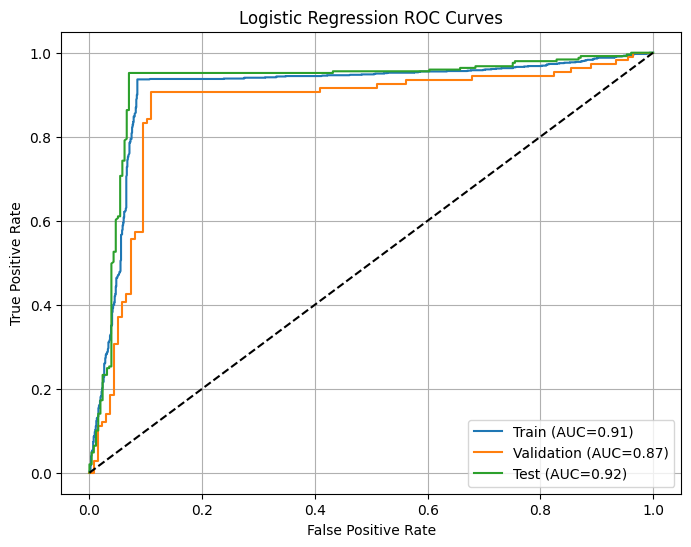

In [0]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def extract_probs_and_labels(predictions_df):
    pdf = predictions_df.select("probability", "Personality").toPandas()
    pdf["prob"] = pdf["probability"].apply(lambda x: float(x[1]))
    return pdf["prob"], pdf["Personality"]

# Extract probs and labels
train_prob, train_labels = extract_probs_and_labels(train_preds)
val_prob, val_labels = extract_probs_and_labels(val_preds)
test_prob, test_labels = extract_probs_and_labels(test_preds)

# Compute ROC curves
def plot_roc(y_true, y_scores, label):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label} (AUC={auc_score:.2f})")

plt.figure(figsize=(8,6))
plot_roc(train_labels, train_prob, "Train")
plot_roc(val_labels, val_prob, "Validation")
plot_roc(test_labels, test_prob, "Test")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curves")
plt.legend()
plt.grid(True)
plt.show()

---